In [1]:
import numpy as np

import matplotlib.pyplot as plt

font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

# **LDos Average Attack Results**

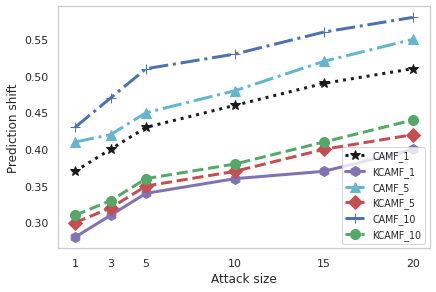

In [8]:
attack_size = np.array([1, 3, 5, 10, 15, 20])

CAMF_Avg_1 = np.array([0.37, 0.4, 0.43, 0.46, 0.49, 0.51])
KCAMF_Avg_1 = np.array([0.28, 0.31, 0.34, 0.36, 0.37, 0.40])

CAMF_Avg_5 = np.array([0.41, 0.42, 0.45, 0.48, 0.52, 0.55])
KCAMF_Avg_5 = np.array([0.30, 0.32, 0.35, 0.37, 0.40, 0.42])

CAMF_Avg_10 = np.array([0.43, 0.47, 0.51, 0.53, 0.56, 0.58])
KCAMF_Avg_10 = np.array([0.31, 0.33, 0.36, 0.38, 0.41, 0.44])

fig, ax = plt.subplots(1, 1)
ax.set(xlabel='Attack size', ylabel='Prediction shift')

ax.plot(attack_size, CAMF_Avg_1,  'k', linestyle='dotted', marker='*', markersize=10, label = 'CAMF_1', linewidth = 3)
ax.plot(attack_size, KCAMF_Avg_1, 'm', linestyle='solid', marker='h', markersize=10, label = 'KCAMF_1', linewidth = 3)

ax.plot(attack_size, CAMF_Avg_5,  'c', linestyle='dashdot', marker='^', markersize=10, label = 'CAMF_5', linewidth = 3)
ax.plot(attack_size, KCAMF_Avg_5, 'r', linestyle='dashed', marker='D', markersize=10, label = 'KCAMF_5', linewidth = 3)

ax.plot(attack_size, CAMF_Avg_10,  'b', linestyle='dashdot', marker='+', markersize=10, label = 'CAMF_10', linewidth = 3)
ax.plot(attack_size, KCAMF_Avg_10, 'g', linestyle='dashed', marker='o', markersize=10, label = 'KCAMF_10', linewidth = 3)

ax.grid()
plt.xticks(attack_size)
ax.legend(loc='lower right',prop = {'size' : 9.5})
#ax.legend(loc='center left', bbox_to_anchor=(0.6, 2),fancybox = True, shadow = True, prop = {'size' : 12})

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#plt.savefig('RMSE_rat.png')
plt.show()

In [9]:
import pandas as pd
# Method: 0 is CAMF, 1 is KCAMF
avg_ps = np.array([[1, 0,  1, 0.37],
                  [1, 1, 1, 0.28],
                  [3, 0,  1, 0.40],
                  [3, 1, 1, 0.31],
                  [5, 0,  1, 0.43],
                  [5, 1, 1, 0.34],
                  [10, 0, 1, 0.46],
                  [10, 1, 1, 0.36],
                  [15, 0, 1, 0.49],
                  [15, 1, 1, 0.37],
                  [20, 0, 1, 0.51],
                  [20, 1, 1, 0.40],
                  [1, 0,  5, 0.41],
                  [1, 1, 5, 0.30],
                  [3, 0,  5, 0.42],
                  [3, 1, 5, 0.32],
                  [5, 0,  5, 0.45],
                  [5, 1, 5, 0.35],
                  [10, 0, 5, 0.48],
                  [10, 1, 5, 0.37],
                  [15, 0, 5, 0.52],
                  [15, 1, 5, 0.40],
                  [20, 0, 5, 0.55],
                  [20, 1, 5, 0.42],
                  [1, 0,  10, 0.43],
                  [1, 1, 10, 0.31],
                  [3, 0,  10, 0.47],
                  [3, 1, 10, 0.33],
                  [5, 0,  10, 0.51],
                  [5, 1, 10, 0.36],
                  [10, 0, 10, 0.53],
                  [10, 1, 10, 0.38],
                  [15, 0, 10, 0.56],
                  [15, 1, 10, 0.41],
                  [20, 0, 10, 0.58],
                  [20, 1, 10, 0.44]])
cols = ['Attack_size', 'Method', 'Target', 'Prediction_shift']
avg_ps_df = pd.DataFrame(avg_ps, columns = cols)
avg_ps_df = avg_ps_df.astype({'Attack_size':'int'})
avg_ps_df = avg_ps_df.astype({'Target':'int'})
avg_ps_df = avg_ps_df.astype({'Method':'int'})
avg_ps_df.head()

,Attack_size,Method,Target,Prediction_shift
0,1,0,1,0.37
1,1,1,1,0.28
2,3,0,1,0.40
3,3,1,1,0.31
4,5,0,1,0.43


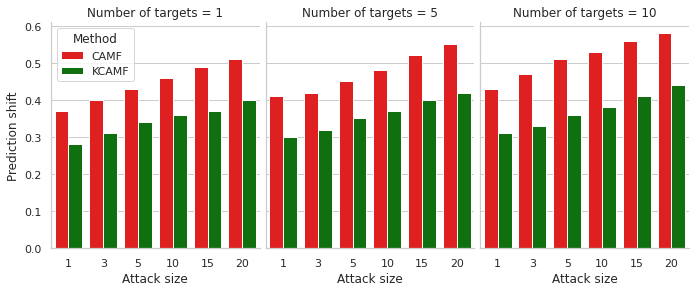

In [10]:
import seaborn as sns

# parameters
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("whitegrid", rc=custom_style)

sns.set_theme(style="whitegrid")
sns.set_context("notebook")
#sns.set(style="ticks", color_codes=True)
#sns.set_style("ticks", {"xtick.major.size":12, "ytick.major.size":12})
g = sns.catplot(x="Attack_size", y="Prediction_shift",
                hue="Method", col="Target",
                data=avg_ps_df, kind="bar",
                height=4, aspect=0.8, palette=sns.color_palette(['red', 'green']),
                legend_out=False);

g.set_xlabels('Attack size', fontsize=12)
g.set_ylabels('Prediction shift', fontsize=12)
# title
new_title = 'Method'
g._legend.set_title(new_title)
# replace labels
new_labels = ['CAMF', 'KCAMF']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

for col_key, ax in g.axes_dict.items():
    ax.set_title(f"Number of targets = {col_key}", fontsize=12)

#plt.tight_layout()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('LDos_Avg_PS.png', dpi=500)


# **LDos Love/Hate Attack Results**

In [11]:
import pandas as pd
# Method: 0 is CAMF, 1 is KCAMF
cols = ['Attack_size', 'Method', 'Target', 'Prediction_shift']
lh_ps = np.array([[1, 0,  1, 0.35],
                  [1, 1, 1, 0.27],
                  [3, 0,  1, 0.37],
                  [3, 1, 1, 0.28],
                  [5, 0,  1, 0.39],
                  [5, 1, 1, 0.31],
                  [10, 0, 1, 0.40],
                  [10, 1, 1, 0.33],
                  [15, 0, 1, 0.42],
                  [15, 1, 1, 0.36],
                  [20, 0, 1, 0.43],
                  [20, 1, 1, 0.38],
                  [1, 0,  5, 0.41],
                  [1, 1, 5, 0.31],
                  [3, 0,  5, 0.43],
                  [3, 1, 5, 0.35],
                  [5, 0,  5, 0.47],
                  [5, 1, 5, 0.38],
                  [10, 0, 5, 0.51],
                  [10, 1, 5, 0.40],
                  [15, 0, 5, 0.53],
                  [15, 1, 5, 0.43],
                  [20, 0, 5, 0.54],
                  [20, 1, 5, 0.44],
                  [1, 0,  10, 0.43],
                  [1, 1, 10, 0.32],
                  [3, 0,  10, 0.46],
                  [3, 1, 10, 0.35],
                  [5, 0,  10, 0.48],
                  [5, 1, 10, 0.39],
                  [10, 0, 10, 0.50],
                  [10, 1, 10, 0.41],
                  [15, 0, 10, 0.53],
                  [15, 1, 10, 0.44],
                  [20, 0, 10, 0.55],
                  [20, 1, 10, 0.45]])

lh_ps_df = pd.DataFrame(lh_ps, columns = cols)
lh_ps_df = lh_ps_df.astype({'Attack_size':'int'})
lh_ps_df = lh_ps_df.astype({'Target':'int'})
lh_ps_df = lh_ps_df.astype({'Method':'int'})
lh_ps_df.head()

,Attack_size,Method,Target,Prediction_shift
0,1,0,1,0.35
1,1,1,1,0.27
2,3,0,1,0.37
3,3,1,1,0.28
4,5,0,1,0.39


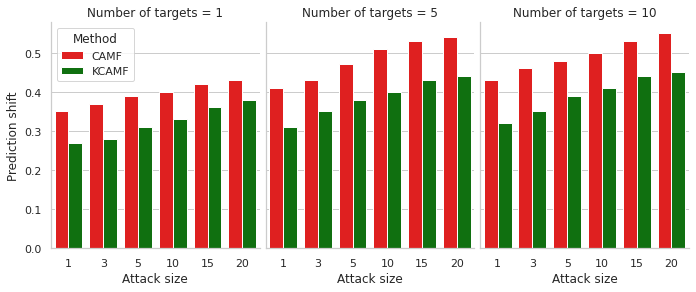

In [12]:
import seaborn as sns

# parameters
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("whitegrid", rc=custom_style)

sns.set_theme(style="whitegrid")
sns.set_context("notebook")
#sns.set(style="ticks", color_codes=True)
#sns.set_style("ticks", {"xtick.major.size":12, "ytick.major.size":12})
g = sns.catplot(x="Attack_size", y="Prediction_shift",
                hue="Method", col="Target",
                data=lh_ps_df, kind="bar",
                height=4, aspect=0.8, palette=sns.color_palette(['red', 'green']),
                legend_out=False);

g.set_xlabels('Attack size', fontsize=12)
g.set_ylabels('Prediction shift', fontsize=12)
# title
new_title = 'Method'
g._legend.set_title(new_title)
# replace labels
new_labels = ['CAMF', 'KCAMF']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

for col_key, ax in g.axes_dict.items():
    ax.set_title(f"Number of targets = {col_key}", fontsize=12)

#plt.tight_layout()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('LDos_LH_PS.png', dpi=500)


# **TripAdvisor Average Attack Results**

In [3]:
import pandas as pd
# Method: 0 is CAMF, 1 is KCAMF
cols = ['Attack_size', 'Method', 'Target', 'Prediction_shift']
avg_ps = np.array([[1, 0,  1, 0.25],
                  [1, 1, 1, 0.11],
                  [3, 0,  1, 0.28],
                  [3, 1, 1, 0.12],
                  [5, 0,  1, 0.31],
                  [5, 1, 1, 0.14],
                  [10, 0, 1, 0.33],
                  [10, 1, 1, 0.17],
                  [15, 0, 1, 0.36],
                  [15, 1, 1, 0.20],
                  [20, 0, 1, 0.39],
                  [20, 1, 1, 0.22],
                  [1, 0,  5, 0.28],
                  [1, 1, 5, 0.15],
                  [3, 0,  5, 0.30],
                  [3, 1, 5, 0.16],
                  [5, 0,  5, 0.33],
                  [5, 1, 5, 0.19],
                  [10, 0, 5, 0.36],
                  [10, 1, 5, 0.21],
                  [15, 0, 5, 0.38],
                  [15, 1, 5, 0.23],
                  [20, 0, 5, 0.40],
                  [20, 1, 5, 0.25],
                  [1, 0,  10, 0.29],
                  [1, 1, 10, 0.18],
                  [3, 0,  10, 0.31],
                  [3, 1, 10, 0.20],
                  [5, 0,  10, 0.34],
                  [5, 1, 10, 0.22],
                  [10, 0, 10, 0.37],
                  [10, 1, 10, 0.24],
                  [15, 0, 10, 0.41],
                  [15, 1, 10, 0.26],
                  [20, 0, 10, 0.43],
                  [20, 1, 10, 0.28]])

avg_ps_df = pd.DataFrame(avg_ps, columns = cols)
avg_ps_df = avg_ps_df.astype({'Attack_size':'int'})
avg_ps_df = avg_ps_df.astype({'Target':'int'})
avg_ps_df = avg_ps_df.astype({'Method':'int'})
avg_ps_df.head()

,Attack_size,Method,Target,Prediction_shift
0,1,0,1,0.25
1,1,1,1,0.11
2,3,0,1,0.28
3,3,1,1,0.12
4,5,0,1,0.31


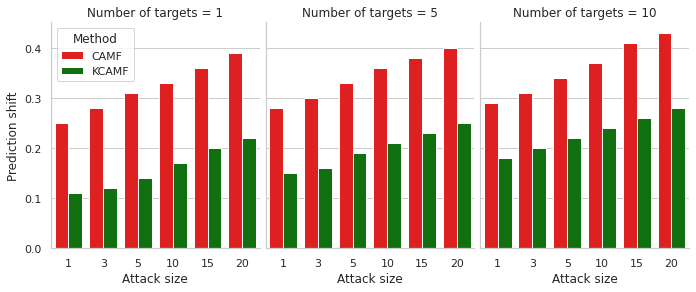

In [5]:
import seaborn as sns

# parameters
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("whitegrid", rc=custom_style)

sns.set_theme(style="whitegrid")
sns.set_context("notebook")
#sns.set(style="ticks", color_codes=True)
#sns.set_style("ticks", {"xtick.major.size":12, "ytick.major.size":12})
g = sns.catplot(x="Attack_size", y="Prediction_shift",
                hue="Method", col="Target",
                data=avg_ps_df, kind="bar",
                height=4, aspect=0.8, palette=sns.color_palette(['red', 'green']),
                legend_out=False);

g.set_xlabels('Attack size', fontsize=12)
g.set_ylabels('Prediction shift', fontsize=12)
# title
new_title = 'Method'
g._legend.set_title(new_title)
# replace labels
new_labels = ['CAMF', 'KCAMF']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

for col_key, ax in g.axes_dict.items():
    ax.set_title(f"Number of targets = {col_key}", fontsize=12)

#plt.tight_layout()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('TA_Avg_PS.png', dpi=500)


# **TripAdvisor Love/Hate Attack Results**

In [6]:
import pandas as pd
# Method: 0 is CAMF, 1 is KCAMF
cols = ['Attack_size', 'Method', 'Target', 'Prediction_shift']
lh_ps = np.array([[1, 0,  1, 0.23],
                  [1, 1, 1, 0.12],
                  [3, 0,  1, 0.24],
                  [3, 1, 1, 0.13],
                  [5, 0,  1, 0.25],
                  [5, 1, 1, 0.15],
                  [10, 0, 1, 0.27],
                  [10, 1, 1, 0.16],
                  [15, 0, 1, 0.30],
                  [15, 1, 1, 0.17],
                  [20, 0, 1, 0.32],
                  [20, 1, 1, 0.18],
                  [1, 0,  5, 0.23],
                  [1, 1, 5, 0.12],
                  [3, 0,  5, 0.25],
                  [3, 1, 5, 0.13],
                  [5, 0,  5, 0.27],
                  [5, 1, 5, 0.14],
                  [10, 0, 5, 0.29],
                  [10, 1, 5, 0.16],
                  [15, 0, 5, 0.31],
                  [15, 1, 5, 0.18],
                  [20, 0, 5, 0.33],
                  [20, 1, 5, 0.19],
                  [1, 0,  10, 0.23],
                  [1, 1, 10, 0.14],
                  [3, 0,  10, 0.25],
                  [3, 1, 10, 0.16],
                  [5, 0,  10, 0.28],
                  [5, 1, 10, 0.17],
                  [10, 0, 10, 0.31],
                  [10, 1, 10, 0.19],
                  [15, 0, 10, 0.33],
                  [15, 1, 10, 0.20],
                  [20, 0, 10, 0.35],
                  [20, 1, 10, 0.21]])

lh_ps_df = pd.DataFrame(lh_ps, columns = cols)
lh_ps_df = lh_ps_df.astype({'Attack_size':'int'})
lh_ps_df = lh_ps_df.astype({'Target':'int'})
lh_ps_df = lh_ps_df.astype({'Method':'int'})
lh_ps_df.head()

,Attack_size,Method,Target,Prediction_shift
0,1,0,1,0.23
1,1,1,1,0.12
2,3,0,1,0.24
3,3,1,1,0.13
4,5,0,1,0.25


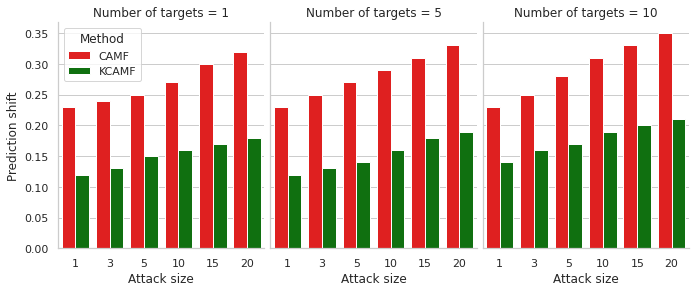

In [7]:
import seaborn as sns

# parameters
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("whitegrid", rc=custom_style)

sns.set_theme(style="whitegrid")
sns.set_context("notebook")
#sns.set(style="ticks", color_codes=True)
#sns.set_style("ticks", {"xtick.major.size":12, "ytick.major.size":12})
g = sns.catplot(x="Attack_size", y="Prediction_shift",
                hue="Method", col="Target",
                data=lh_ps_df, kind="bar",
                height=4, aspect=0.8, palette=sns.color_palette(['red', 'green']),
                legend_out=False);

g.set_xlabels('Attack size', fontsize=12)
g.set_ylabels('Prediction shift', fontsize=12)
# title
new_title = 'Method'
g._legend.set_title(new_title)
# replace labels
new_labels = ['CAMF', 'KCAMF']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

for col_key, ax in g.axes_dict.items():
    ax.set_title(f"Number of targets = {col_key}", fontsize=12)

#plt.tight_layout()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('TA_LH_PS.png', dpi=500)
